In [2]:
from __future__ import absolute_import, division, print_function
import codecs
import multiprocessing
import os
import pprint
import nltk
import gensim
from gensim import corpora, models, similarities
import sklearn.manifold
import numpy as np
import math
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
 
Lyrics_df = pd.read_csv('farasa_lyrics.csv')
# Dataset is now stored in a Pandas Dataframe

In [7]:
Lyrics_df.head()

,Unnamed: 0,Unnamed: 0.1,songID,Singer,SongTitle,SongWriter,Composer,LyricsOrder,Lyrics,SingerNationality,SongDialect,Clean_Lyrics,Lyrics_lemmatized
0,16,16,1538,ابتسام,اروح لحبايبى,ملامح,بندر بن فهد,1,اروح لاحبابي والاقي الفرح ساكن عينهم,morocco,meghribi,"['اروح', 'لاحبابي', 'والاقي', 'الفرح', 'ساكن',...","['اروح', 'احباب', 'اقي', 'فرح', 'ساكن', 'عين']"
1,17,17,1538,ابتسام,اروح لحبايبى,ملامح,بندر بن فهد,2,ابتسم لافراحهم وانا من الهم احترق,morocco,meghribi,"['ابتسم', 'لافراحهم', 'وانا', 'الهم', 'احترق']","['ابتسم', 'افراح', 'وان', 'هم', 'احترق']"
2,18,18,1538,ابتسام,اروح لحبايبى,ملامح,بندر بن فهد,3,واسأل جروحي من ترى حس بعذابي منهم,morocco,meghribi,"['واسل', 'جروحي', 'ترى', 'حس', 'بعذابي', 'منهم']","['اسل', 'جرح', 'رأى', 'حس', 'عذاب', 'من']"
3,19,19,1538,ابتسام,اروح لحبايبى,ملامح,بندر بن فهد,4,وبالحقيقه انصدم محدن معه همي فرق,morocco,meghribi,"['وبالحقيقه', 'انصدم', 'محدن', 'معه', 'همي', '...","['حقيقه', 'انصدم', 'محدن', 'مع', 'هم', 'فرق']"
4,20,20,1538,ابتسام,اروح لحبايبى,ملامح,بندر بن فهد,5,دورت في كل الوجيه حسيت غربه بينهم,morocco,meghribi,"['دورت', 'الوجيه', 'حسيت', 'غربه', 'بينهم']","['دورة', 'وجيه', 'حسي', 'غرب', 'بين']"


In [8]:
Lyrics_df.dtypes

Unnamed: 0            int64
Unnamed: 0.1          int64
songID                int64
Singer               object
SongTitle            object
SongWriter           object
Composer             object
LyricsOrder           int64
Lyrics               object
SingerNationality    object
SongDialect          object
Clean_Lyrics         object
Lyrics_lemmatized    object
dtype: object

In [0]:
import ast


In [0]:
Lyrics_df['Lyrics_lemmatized_List'] = Lyrics_df['Lyrics_lemmatized'].map(lambda x:ast.literal_eval(x))


In [0]:
final_list = list(Lyrics_df['Lyrics_lemmatized_List'].values)

In [12]:
Lyrics_df['Lyrics_lemmatized'].values

array(["['اروح', 'احباب', 'اقي', 'فرح', 'ساكن', 'عين']",
       "['ابتسم', 'افراح', 'وان', 'هم', 'احترق']",
       "['اسل', 'جرح', 'رأى', 'حس', 'عذاب', 'من']", ...,
       "['جيت', 'دمعة', 'غرق']", "['ايش', 'قال', 'قلب', 'من', 'ودع']",
       "['ايش', 'قال', 'القلب', 'لمن', 'ودعتهم']"], dtype=object)

**Train Word2Vec**

In [0]:
# Dimensionality of the resulting word vectors
num_feature = 300
# Minimum word count threshold.
min_word_count = 1
# Number of threads to run in parallel.
num_workers = multiprocessing.cpu_count()
# Context window length
context_size = 7
# Downsample setting for frequent words
downsampling = 1e-3
# Seed for RNG, to make the results reproducible
seed = 1

In [0]:
lyrics2vec = gensim.models.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_feature,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [0]:
lyrics2vec.build_vocab(final_list)

In [16]:
print('Word2Vec vocabulary length:', len(lyrics2vec.wv.vocab.keys()))

Word2Vec vocabulary length: 102398


In [0]:
#uncomment to view vocab
#lyrics2vec.wv.vocab

In [23]:
lyrics2vec.most_similar('ياقلبي')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('موسم', 0.24295690655708313),
 ('نفخة', 0.2412198781967163),
 ('ياول', 0.23267044126987457),
 ('مسك', 0.23203639686107635),
 ('يخبوا', 0.22788837552070618),
 ('شالن', 0.22756469249725342),
 ('خليكى', 0.2271377444267273),
 ('تلخبطو', 0.22296689450740814),
 ('يامبعد', 0.22234289348125458),
 ('هتجيني', 0.2201124131679535)]

In [0]:
X = lyrics2vec[lyrics2vec.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


Compress the word vectors into 2D space and plot them

In [0]:
from sklearn.decomposition import PCA
from matplotlib import pyplot


In [0]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

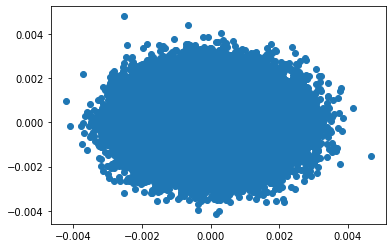

In [0]:
pyplot.scatter(result[:, 0], result[:, 1])

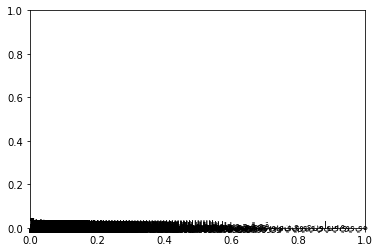

In [0]:

words = list(lyrics2vec.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))